# import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Read Dataset

In [55]:
data=pd.read_csv(r"C:\Users\Mahendra Wagh\Documents\Data set\Migraine Data.csv")
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [3]:
data["Type"].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

# Find null values

In [5]:
data.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

# Data preprocessing 

In [6]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data["Type"]=l1.fit_transform(data["Type"])
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5


In [7]:
##Selecting the dependent and independent variables x and y.

In [8]:
x=data.iloc[:,:-1].values ## Independent variable 
y=data.iloc[:,-1].values ## Dirget/Dependnet variable

In [9]:
data.nunique()

Age            51
Duration        3
Frequency       8
Location        3
Character       3
Intensity       4
Nausea          2
Vomit           2
Phonophobia     2
Photophobia     2
Visual          5
Sensory         3
Dysphasia       2
Dysarthria      2
Vertigo         2
Tinnitus        2
Hypoacusis      2
Diplopia        2
Defect          2
Ataxia          1
Conscience      2
Paresthesia     2
DPF             2
Type            7
dtype: int64

In [10]:
data["Type"].unique()

array([5, 2, 0, 4, 1, 3, 6])

In [11]:
data.duplicated().sum()

6

In [12]:
data.drop_duplicates(keep = 'first', inplace = True)
data

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,0
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,0


# Data viasulization

C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

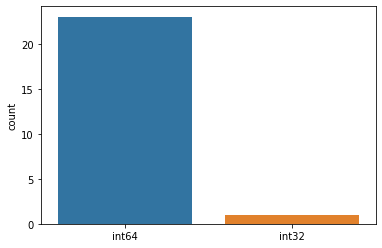

In [13]:
sns.countplot(data.dtypes.map(str))

C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

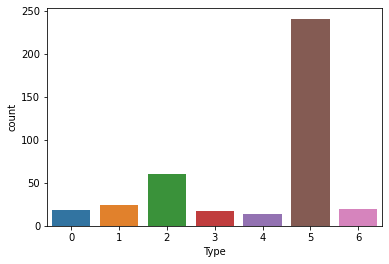

In [14]:
sns.countplot(data["Type"])

C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

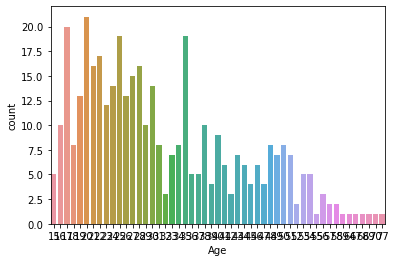

In [15]:
sns.countplot(data["Age"])

C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration', ylabel='count'>

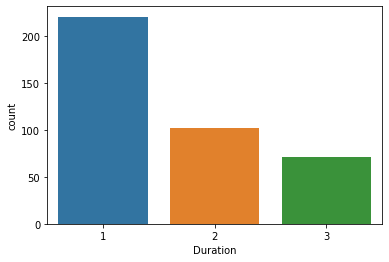

In [16]:
sns.countplot(data['Duration'])

C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='count'>

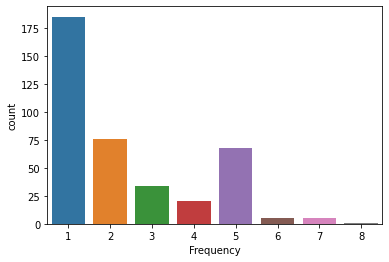

In [17]:
sns.countplot(data["Frequency"])

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

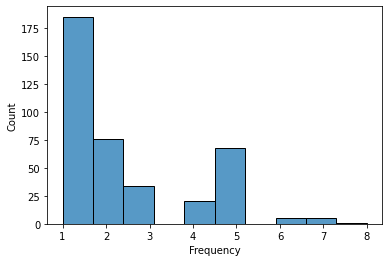

In [18]:
sns.histplot(data['Frequency'])

C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Intensity', ylabel='count'>

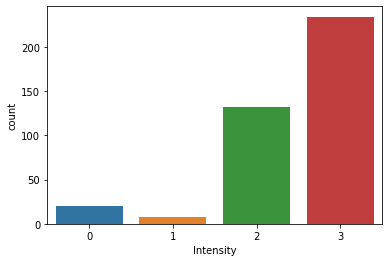

In [19]:
sns.countplot(data['Intensity'])

In [20]:
##Outlier detection using Inter Quantile Range
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

outlier Counter of the all features


Age             4
Duration        0
Frequency       1
Location       29
Character      31
Intensity      20
Nausea          5
Vomit           0
Phonophobia     9
Photophobia     8
Visual          9
Sensory        89
Dysphasia      15
Dysarthria      1
Vertigo        50
Tinnitus       24
Hypoacusis      6
Diplopia        2
Defect          6
Ataxia          0
Conscience      7
Paresthesia     3
DPF             0
Type            0
dtype: int64

In [21]:
##Outliers replace  using Mean 
for col in data.columns:
    if data[col].dtypes != 'object':
        q1 , q3 =data[col].quantile(0.25),data[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        data[col] = np.where(data[col]>ul,data[col].mean(),np.where(data[col]<ll,data[col].mean(),data[col]))     

In [22]:
##Check skewness of the data 
skew=data.skew().sort_values(ascending=False)
skew

Dysarthria     19.849433
Diplopia       13.981858
Paresthesia    11.372110
Defect          7.947494
Hypoacusis      7.947494
Conscience      7.328877
Dysphasia       4.846123
Tinnitus        3.685767
Vertigo         2.250305
Sensory         1.316034
Frequency       0.941587
Duration        0.774982
Vomit           0.750744
Age             0.657259
DPF             0.373164
Ataxia          0.000000
Visual         -0.221405
Intensity      -0.834856
Type           -1.061461
Character      -3.141682
Location       -3.278326
Phonophobia    -6.412015
Photophobia    -6.828282
Nausea         -8.740368
dtype: float64

In [23]:
##Check skewness of the data 
skew=data.skew().sort_values(ascending=False)
skew

Dysarthria     19.849433
Diplopia       13.981858
Paresthesia    11.372110
Defect          7.947494
Hypoacusis      7.947494
Conscience      7.328877
Dysphasia       4.846123
Tinnitus        3.685767
Vertigo         2.250305
Sensory         1.316034
Frequency       0.941587
Duration        0.774982
Vomit           0.750744
Age             0.657259
DPF             0.373164
Ataxia          0.000000
Visual         -0.221405
Intensity      -0.834856
Type           -1.061461
Character      -3.141682
Location       -3.278326
Phonophobia    -6.412015
Photophobia    -6.828282
Nausea         -8.740368
dtype: float64

In [24]:
##Delete irrelevant feature
del data["Ataxia"]

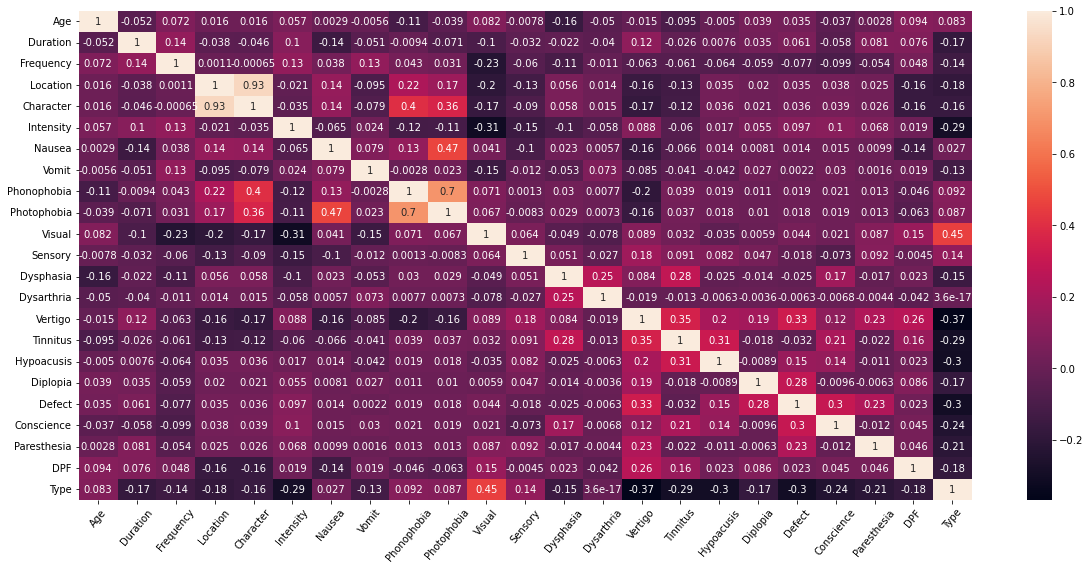

In [25]:
##Correlation between the features  
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=50);

In [26]:
# check counter
from collections import Counter
print(Counter(y))

Counter({5: 247, 2: 60, 1: 24, 6: 20, 0: 18, 3: 17, 4: 14})


In [27]:
## Imbalancing tecniques : convert classes of dependent variable into balced class
from imblearn.over_sampling import RandomOverSampler
r=RandomOverSampler()
x_data,y_data=r.fit_resample(x,y)
print(Counter(y_data))

Counter({5: 247, 2: 247, 0: 247, 4: 247, 1: 247, 3: 247, 6: 247})


In [28]:
# using Feature scalling technique :Standardazation used for reducing high magnitude of coefficient
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x_data)
print('x_scale',x_scaled)

x_scale [[ 0.05410551 -0.88306111  1.7174135  ... -0.21881222 -0.1577855
  -1.03712596]
 [ 1.86355289  1.56375405  1.7174135  ... -0.21881222 -0.1577855
  -1.03712596]
 [ 2.13497     0.34034647 -0.72503597 ... -0.21881222 -0.1577855
  -1.03712596]
 ...
 [ 0.05410551 -0.88306111 -0.1144236  ... -0.21881222 -0.1577855
  -1.03712596]
 [-0.85061818  1.56375405  1.7174135  ... -0.21881222 -0.1577855
   0.96420304]
 [-0.85061818  1.56375405  1.7174135  ... -0.21881222 -0.1577855
   0.96420304]]


In [29]:
x_scaled.reshape(-1,1)

array([[ 0.05410551],
       [-0.88306111],
       [ 1.7174135 ],
       ...,
       [-0.21881222],
       [-0.1577855 ],
       [ 0.96420304]])

In [30]:
# spliting the data in train data and test data format
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=11)

In [31]:
# Use Logistic Regression For Prediction
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)


C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=l1.predict(x_test)
print("Predicted value",y_pred)
y_score=accuracy_score(y_test,y_pred)
print("Accuracy",y_score*100)

Predicted value [6 3 0 0 1 0 5 5 1 6 4 6 2 5 2 0 5 5 5 0 0 3 4 1 4 6 4 4 0 5 6 0 2 5 6 1 6
 3 2 2 0 6 1 1 2 6 6 4 4 5 5 3 2 2 3 2 0 2 5 1 3 2 5 1 2 2 6 4 0 1 4 2 0 0
 4 0 6 0 5 3 0 3 2 4 4 0 3 0 1 2 1 5 4 2 5 2 4 0 3 1 3 0 6 6 0 4 2 0 0 2 6
 0 0 1 4 5 4 3 6 4 2 5 3 1 2 2 3 0 0 0 6 2 5 1 1 1 2 2 2 0 5 1 5 1 0 0 5 2
 4 6 0 5 4 4 6 1 6 3 5 6 1 3 5 1 1 2 5 6 4 0 1 4 0 3 2 3 2 5 0 2 6 6 5 3 4
 6 1 5 5 5 1 6 0 6 2 1 2 4 4 1 0 5 6 1 3 5 4 1 6 5 3 6 1 4 5 5 1 0 3 5 4 3
 1 1 1 1 4 3 2 4 5 3 4 2 1 4 4 3 0 4 3 5 2 6 1 5 6 2 1 4 4 6 0 1 3 4 0 6 6
 4 0 0 6 0 0 1 0 5 5 4 3 0 2 5 5 4 5 0 3 1 4 0 5 1 1 2 1 5 3 1 1 1 1 1 0 1
 4 3 2 2 2 0 1 1 4 4 6 2 1 6 4 5 1 5 6 6 1 2 1 1 6 1 0 0 4 4 6 4 4 2 6 2 5
 6 4 5 6 0 2 3 2 6 3 4 3 4 4 0 4 2 0 3 0 3 1 6 2 4 4 4 1 0 1 3 6 3 4 5 5 0
 3 3 3 0 4 6 2 2 4 2 3 3 6 6 1 5 4 1 5 4 5 3 4 6 6 1 6 4 6 4 0 2 2 6 2 5 1
 3 6 4 4 2 4 0 3 1 1 6 0 2 1 4 1 2 5 0 3 3 1 5 3 3 6]
Accuracy 92.60969976905312


# Cross Validation Techniques : KFold 

In [33]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=9,random_state=15,shuffle=True)
kf.get_n_splits(x_data)

9

In [34]:
## Cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
score1=cross_val_score(l1,x_data,y_data)
cv_pred=cross_val_predict(l1,x_test,y_test)
print(cv_pred)
print(score1)
print("Average accuracy",score1.mean().round(4)*100,"%")

C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[6 3 0 0 1 0 5 5 1 6 4 6 2 5 2 0 5 5 5 0 0 3 4 1 4 6 4 4 0 4 6 0 2 5 6 1 6
 3 2 2 0 6 1 1 2 6 6 4 4 5 5 3 2 2 3 2 0 2 4 1 3 2 5 1 2 2 6 4 0 1 4 2 0 0
 4 0 6 0 3 3 0 3 2 4 4 0 3 0 1 2 1 5 4 2 5 5 4 0 3 1 3 0 6 6 0 4 2 0 0 2 6
 0 0 1 4 5 4 3 6 4 2 5 3 1 2 2 3 0 0 0 6 2 5 1 1 1 2 2 2 0 5 1 4 1 0 0 5 2
 4 6 0 5 4 4 6 1 6 3 5 6 1 3 5 1 1 2 5 6 4 0 1 4 0 3 2 3 2 5 0 2 6 6 5 3 4
 6 1 5 5 5 1 6 0 6 2 1 2 4 4 1 0 5 6 1 3 5 4 1 6 4 3 6 1 4 1 4 1 0 3 5 4 3
 1 1 1 1 4 3 2 4 5 3 4 2 1 4 4 3 0 4 3 5 2 6 1 5 6 2 1 4 4 6 0 1 3 4 0 6 6
 4 0 0 6 0 0 1 0 4 5 4 3 0 2 5 5 4 5 0 5 1 4 0 5 1 1 2 5 5 3 1 1 1 1 1 0 1
 4 3 2 2 2 0 1 5 4 4 6 2 1 6 4 5 1 5 6 6 1 2 1 1 6 1 0 0 4 4 6 4 4 2 6 2 4
 6 4 5 6 0 2 3 2 6 3 4 3 4 4 0 4 2 0 3 0 3 1 6 2 4 4 4 1 0 1 3 6 3 4 5 5 0
 3 3 3 0 4 6 2 2 4 2 3 3 6 6 1 4 4 1 5 4 5 3 4 6 6 1 6 4 6 4 0 2 2 6 2 5 1
 3 6 4 4 2 4 0 3 5 1 6 0 2 1 4 1 5 5 0 3 3 1 5 3 3 6]
[0.9017341  0.94219653 0.93930636 0.90462428 0.93913043]
Average accuracy 92.54 %


C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM Alogorithm

In [35]:
from sklearn.svm import SVC
s1=SVC()
model3=s1.fit(x_train,y_train)
model3

SVC()

In [36]:
svm_pred=model3.predict(x_test)
print("Predcted SVM",svm_pred)

Predcted SVM [6 3 0 0 1 1 1 1 1 6 1 6 2 0 2 0 3 1 0 0 1 0 1 1 1 6 1 1 0 1 6 3 2 0 6 1 6
 2 2 2 1 6 1 1 2 5 6 1 1 0 3 3 3 2 3 1 0 2 1 1 3 2 1 1 2 2 6 4 1 1 4 2 0 1
 4 1 6 0 0 3 1 1 0 0 1 0 3 1 1 2 1 1 4 2 3 3 1 0 3 1 3 0 6 6 1 1 2 0 3 2 6
 1 0 1 1 0 1 3 6 1 2 0 1 1 2 2 1 0 0 1 6 2 3 1 1 1 2 2 1 1 1 1 1 1 0 0 0 2
 1 6 0 1 1 1 5 1 5 3 2 6 1 1 1 1 1 2 0 6 0 0 1 1 0 0 2 2 2 1 0 2 6 6 2 3 1
 6 1 3 1 0 1 6 0 6 2 1 0 1 1 1 0 0 6 1 3 0 1 1 6 1 3 6 1 1 0 1 1 0 3 3 1 3
 1 1 1 1 1 3 2 1 2 0 4 1 1 1 4 1 1 1 1 1 2 6 1 0 6 2 1 4 1 6 0 1 3 1 1 6 6
 1 0 1 6 3 1 1 0 1 0 1 1 0 2 0 2 1 1 0 3 1 4 0 1 1 1 0 1 0 2 1 1 1 1 1 1 1
 4 0 2 2 2 0 1 0 1 0 6 2 1 6 4 0 1 1 6 6 1 2 1 1 6 1 0 0 0 1 6 1 4 2 6 2 1
 6 4 0 6 1 2 0 2 6 3 1 3 4 4 0 1 2 0 0 1 0 1 6 2 1 1 1 1 1 1 3 6 3 1 0 2 0
 3 1 1 1 1 6 2 2 1 2 3 0 6 6 1 1 1 1 1 4 0 3 1 6 6 1 6 1 6 1 3 2 2 6 2 1 1
 0 6 1 1 2 1 0 3 0 1 6 1 1 1 4 1 1 1 0 3 1 1 0 1 1 6]


In [37]:
#print(accuracy_score(svm_pred,y_test))
from sklearn.metrics import accuracy_score
score2=accuracy_score(svm_pred,y_test)
print("Average accuracy",score2.mean().round(4)*100,"%")

Average accuracy 58.43000000000001 %


# KNN Algorithm

In [39]:
from sklearn.neighbors import KNeighborsClassifier 
k1=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
model2=k1.fit(x_train,y_train)
model2


KNeighborsClassifier()

In [41]:
knn_pred=model2.predict(x_test)


In [42]:
print(knn_pred)

[6 3 0 0 1 0 5 5 1 6 4 6 2 5 2 0 5 4 5 0 0 3 4 1 4 6 4 4 0 4 6 0 2 2 6 1 6
 3 2 2 0 6 1 1 2 6 6 4 4 5 5 3 2 2 3 2 0 2 4 1 3 2 5 1 2 5 6 4 0 1 4 2 0 0
 4 0 6 0 3 3 0 3 3 5 4 0 3 0 1 2 1 4 4 2 5 2 4 0 3 1 3 0 6 6 0 4 2 0 0 2 6
 0 0 1 4 3 4 3 6 4 2 1 3 1 2 2 3 0 0 0 6 2 2 1 1 1 2 2 5 0 1 1 4 1 0 0 5 2
 4 6 0 1 4 4 6 1 6 3 2 6 1 3 5 1 1 2 5 6 4 0 1 4 0 3 2 3 2 4 0 2 6 6 5 3 4
 6 5 5 1 5 1 6 0 6 2 1 2 4 4 1 0 5 6 1 3 5 4 1 6 5 3 6 1 5 5 4 1 0 3 5 5 3
 1 1 1 1 4 3 2 4 2 3 4 2 1 4 4 3 0 4 3 0 2 6 1 2 6 2 1 4 4 6 0 1 3 4 0 6 6
 4 0 0 6 0 0 1 0 5 2 4 3 0 2 5 2 4 5 0 3 1 4 0 1 1 1 3 5 2 3 1 1 1 1 1 0 1
 4 3 2 2 2 0 1 5 4 4 6 2 1 6 4 5 1 4 6 6 1 2 1 1 6 1 0 0 4 4 6 4 4 2 6 2 4
 6 4 0 6 0 2 3 2 6 3 4 3 4 4 0 5 2 0 3 0 3 1 6 2 4 4 4 1 0 1 3 6 3 4 5 5 0
 3 3 3 0 4 6 2 2 4 2 3 3 6 6 1 4 1 4 5 4 2 3 4 6 6 1 6 1 6 4 0 2 2 6 2 5 1
 3 6 5 4 2 4 0 3 5 1 6 0 2 1 4 1 2 1 0 3 3 5 5 3 3 6]


In [43]:
score3=accuracy_score(knn_pred,y_test)
print("Average accuracy",score3.mean().round(4)*100,"%")

Average accuracy 94.69 %


# Random Forest Algorithm

In [44]:
from sklearn.ensemble import RandomForestClassifier
r1=RandomForestClassifier()
r1.fit(x_train,y_train)


RandomForestClassifier()

In [45]:
rf_pred=r1.predict(x_test)
rf_pred

array([6, 3, 0, 0, 1, 0, 5, 5, 1, 6, 4, 6, 2, 5, 2, 0, 5, 4, 5, 0, 0, 3,
       4, 1, 4, 6, 4, 4, 0, 4, 6, 0, 2, 5, 6, 1, 6, 3, 2, 2, 0, 6, 1, 1,
       2, 6, 6, 4, 4, 5, 5, 3, 2, 2, 3, 2, 0, 2, 4, 1, 3, 2, 5, 1, 2, 2,
       6, 4, 0, 1, 4, 2, 0, 0, 4, 0, 6, 0, 5, 3, 0, 3, 3, 4, 4, 0, 3, 0,
       1, 2, 1, 4, 4, 2, 5, 2, 4, 0, 3, 1, 3, 0, 6, 6, 0, 4, 2, 0, 0, 2,
       6, 0, 0, 1, 4, 5, 5, 3, 6, 4, 2, 5, 3, 1, 2, 2, 3, 0, 0, 0, 6, 2,
       5, 1, 1, 1, 2, 2, 2, 0, 5, 1, 4, 1, 0, 0, 5, 2, 4, 6, 0, 1, 4, 4,
       6, 1, 6, 3, 5, 6, 1, 3, 5, 1, 1, 2, 5, 6, 4, 0, 1, 4, 0, 3, 2, 3,
       2, 4, 0, 2, 6, 6, 5, 3, 4, 6, 5, 5, 5, 5, 1, 6, 0, 6, 2, 1, 2, 4,
       4, 1, 0, 5, 6, 1, 3, 5, 4, 1, 6, 5, 3, 6, 1, 5, 5, 4, 1, 0, 3, 5,
       4, 3, 1, 1, 1, 5, 4, 3, 2, 4, 5, 3, 4, 2, 1, 4, 4, 3, 0, 4, 3, 5,
       2, 6, 1, 5, 6, 2, 1, 4, 4, 6, 0, 1, 3, 4, 0, 6, 6, 4, 0, 0, 6, 0,
       0, 1, 0, 5, 5, 4, 3, 0, 2, 5, 5, 4, 5, 0, 3, 1, 4, 0, 1, 1, 1, 3,
       5, 5, 3, 1, 1, 1, 1, 1, 0, 1, 4, 3, 2, 2, 2,

In [46]:
score4=accuracy_score(rf_pred,y_test)
print("Average accuracy",score4.mean().round(4)*100,"%")

Average accuracy 98.85000000000001 %


# Ensemble Technique

In [48]:
from sklearn.ensemble import VotingClassifier
vote=VotingClassifier(estimators=(["Logistic",l1],["SVM",s1],["KNN",k1],["Random Forest",r1]))
vote

VotingClassifier(estimators=(['Logistic', LogisticRegression()], ['SVM', SVC()],
                             ['KNN', KNeighborsClassifier()],
                             ['Random Forest', RandomForestClassifier()]))

In [49]:
vote_model=vote.fit(x_train,y_train)
vote_model

C:\Users\Mahendra Wagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=(['Logistic', LogisticRegression()], ['SVM', SVC()],
                             ['KNN', KNeighborsClassifier()],
                             ['Random Forest', RandomForestClassifier()]))

In [50]:
 vote_pred=vote_model.predict(x_test)

In [51]:
score5=accuracy_score(vote_pred,y_test)
print("Average accuracy",score5.mean().round(4)*100,"%")

Average accuracy 96.07 %


In [53]:
Prediction=pd.DataFrame({"Actual Y":y_test,"Logistic":y_pred,"SVM":svm_pred,"KNN":knn_pred,"RandomForest":rf_pred,"Cross Validation":cv_pred,"Voting":vote_pred})
Prediction

,Actual Y,Logistic,SVM,KNN,RandomForest,Cross Validation,Voting
0,6,6,6,6,6,6,6
1,3,3,3,3,3,3,3
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
428,5,1,1,5,1,1,1
429,5,5,0,5,5,5,5
430,3,3,1,3,3,3,3
431,3,3,1,3,3,3,3


# From this above outputs when we predict the migraine then logistic regression gives the 92% accuray ,it best for the model ,we use here some techniques likes standardization ,Correlation,Imbalnacing ,Cross Validation due to that it helps to imporove the 
# prediction of the data with good performance ,and also we check the outlier detection it this there are many outlier are present in the dataset ,we deal with this using the mean techniques .
# Now we use the ensemble techniques ,it gives the best result ,due to that we can trust on the model prediction ,in this we use the some Algorithms like KNearest Neighbor,Support Vector machine ,Random Forest .
# In this we go for the Voting Classifier ,it gives the 96% accuracy to predict the appropriate value .
# henece this techniques is good for this data set.